##**PORTFOLIO PROJECT ON HEART FAILURE PREDICTION ANALYSIS**



**By: Ibrahim Musbaudeen Olaitan**



In [41]:
#Importing required Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score

##First step: Importing and Exploring the dataset

In [2]:
data =pd.read_csv("/content/drive/MyDrive/DATASETS/heart_failure_clinical_records_dataset.csv")

In [3]:
type(data)

pandas.core.frame.DataFrame

In [4]:
data.shape

(299, 13)

## Note:
#### We have 299 and 13 columns

In [5]:
data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [6]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [7]:
### For better analysis the dataset will be segmented into categorical data and continous data

In [8]:
categorical_data= data[["anaemia","diabetes","high_blood_pressure","sex","smoking"]]
continous_data= data[["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium","time"]]

### Categorical data representation:
####Anaemia: 0 means that the person does not have anaemia, if 1 they do
####Diabetes: 0 means that the person does not have Diabetes, if 1 they do
####high_blood_pressure: 0 means that the person does not have high_blood_pressure, if 1 they do
####sex: 0 means that the person does is a female, if 1 its a male
####smoking: 0 means that the person does not smoking, if 1 they do
####DEATH_EVENT: 0 means that the person do not die as a result of hearth disease, if 1 they do


In [9]:
data.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [10]:
### We can see that there is no missing data in our dataset

In [11]:
"""
To conduct a descriptive analysis for continous data we use the fuction describe()
"""
continous_data.describe()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
count,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000
mean,60.833893,581.839465,38.083612,263358.029264,1.39388,136.625418,130.260870
std,11.894809,970.287881,11.834841,97804.236869,1.03451,4.412477,77.614208
min,40.000000,23.000000,14.000000,25100.000000,0.50000,113.000000,4.000000
25%,51.000000,116.500000,30.000000,212500.000000,0.90000,134.000000,73.000000
50%,60.000000,250.000000,38.000000,262000.000000,1.10000,137.000000,115.000000
75%,70.000000,582.000000,45.000000,303500.000000,1.40000,140.000000,203.000000
max,95.000000,7861.000000,80.000000,850000.000000,9.40000,148.000000,285.000000


In [12]:
data.groupby("DEATH_EVENT").count()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
DEATH_EVENT,,,,,,,,,,,,
0,203,203,203,203,203,203,203,203,203,203,203,203
1,96,96,96,96,96,96,96,96,96,96,96,96


The data is unbalanced due to its skewness. i.e the total death is 96 and which is less than half of the total non death as a result of heart failure is 203,

In [13]:
age= data[["age"]]
platelets= data[["platelets"]]

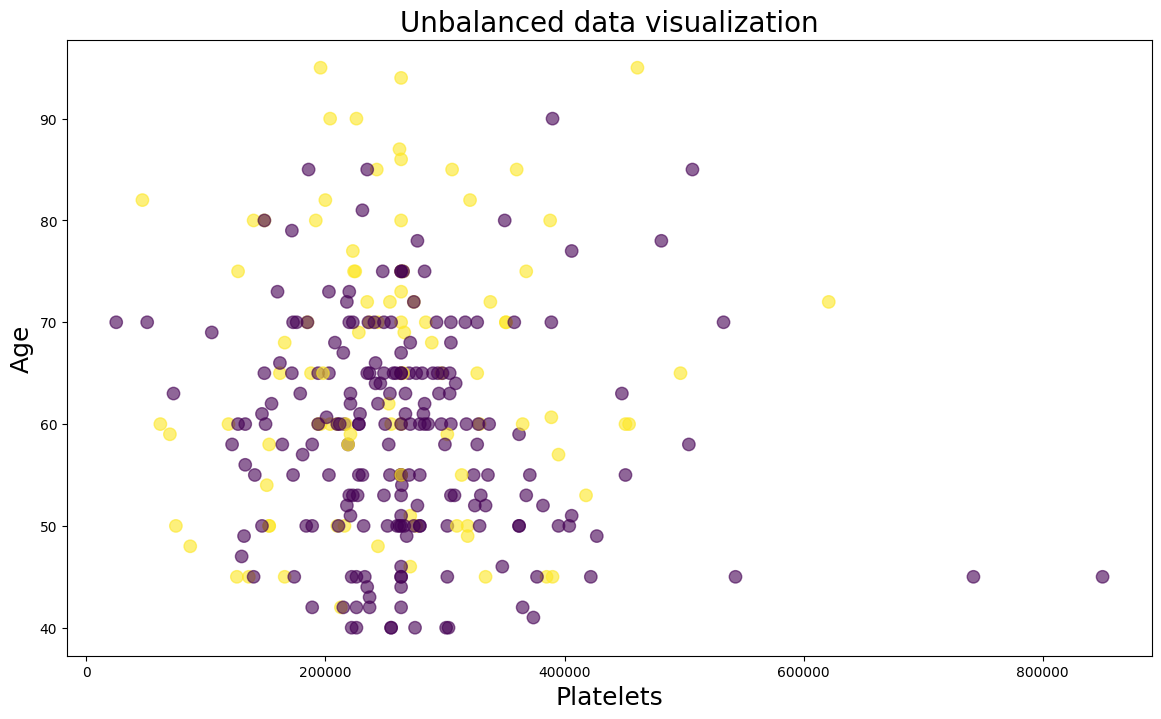

In [14]:
#Now we visualize the unbalanced data using scatterplot, the color will depend on DEATH_EEVENT (0 or 1)

plt.figure(figsize=(14,8))
plt.scatter(platelets,age, c= data["DEATH_EVENT"], s=80, alpha= 0.6)
plt.xlabel("Platelets", fontsize= 18)
plt.ylabel("Age", fontsize= 18)
plt.title("Unbalanced data visualization", fontsize= 20)
plt.show()

**INSIGHT:**
The visualization showed more data in purple than in yellow


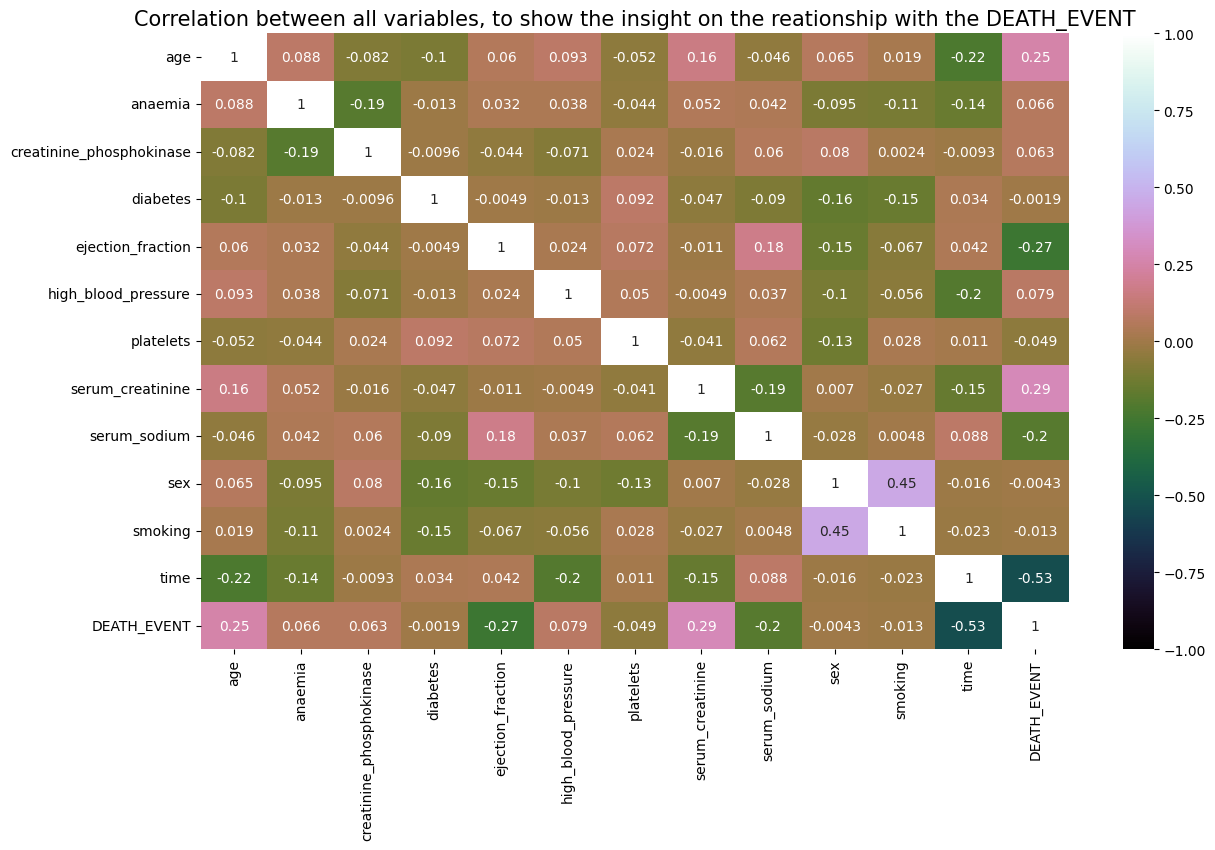

In [15]:
plt.figure(figsize=(14,8))
colormap= sns.color_palette("Greens")
sns.heatmap(data.corr(),vmin=-1, vmax=1, cmap="cubehelix",annot=True)
plt.title("Correlation between all variables, to show the insight on the reationship with the DEATH_EVENT",fontsize= 15)
plt.show()

**INSIGHT:** The result shows a positive correlation of serum creatinine with the death event at Corr of 0.29, which means the higher the serum creatinine the more death event chances as a result of heart failure. Furthermore, negative correlattion was identified between the time, serum_sodium and ejection fraction on the death event as a result of heart failure at corr of -0.53, -0.2, -0.27 respectively.

In [16]:
data.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


This will show us the raw data frame for the correlation of the varibales, which provides us the their relationship with the DEATH_EVENT


##**SECOND STEP:** Data Visualization

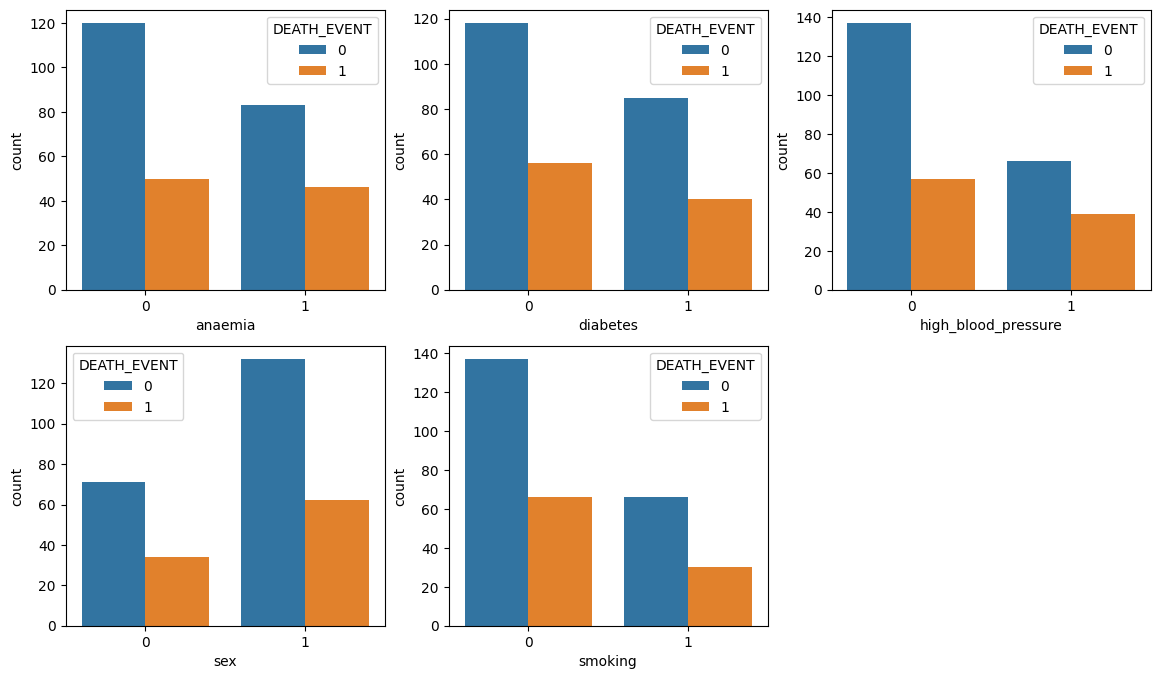

In [17]:
#Plotting the relationship between the categorical data and the DEATH_EVENT

plt.figure(figsize=(14,8))
for i,cat in enumerate(categorical_data):
  plt.subplot(2,3,i+1)
  sns.countplot(data=data, x=cat, hue= "DEATH_EVENT")
plt.show()

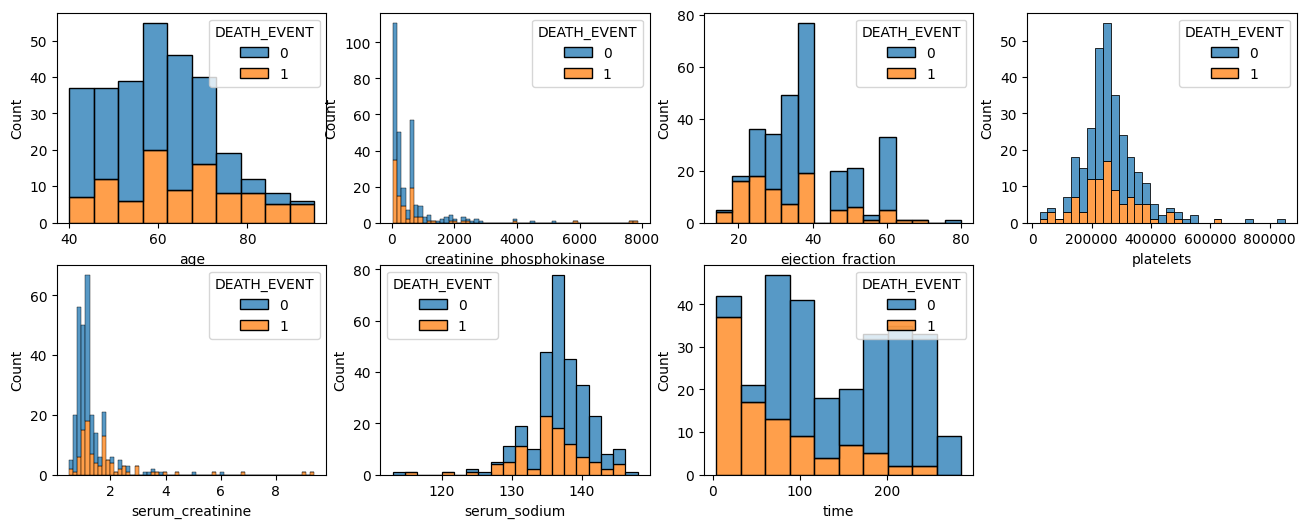

In [18]:
#Plotting the effect of the continous variables on DEATH_EVENT

plt.figure(figsize=(16,6))
for i,con in enumerate(continous_data):
  plt.subplot(2,4,i+1)
  sns.histplot(data=data, x=con, hue= "DEATH_EVENT", multiple="stack")
plt.show()

**INSIGHTS**: The histogram analysis presents significant insights into death events attributed to heart failure across various parameters.

**Age Distribution:**
A notable peak in death events is observed at ages 60 and 70, indicating a higher susceptibility to heart failure-related mortality within these age groups.

**Creatinine Phosphokinase (CPK) Levels:**
Death events predominantly occur within the range of 0 to 1000 in CPK levels, with a noteworthy concentration of fatalities when CPK levels approach zero. This suggests a potential correlation between lower CPK levels and increased risk of heart failure-related deaths.

**Ejection Fraction (EF):**
The data reveals an increased occurrence of death events when EF falls within the 20-40 range, emphasizing the criticality of EF levels in predicting mortality due to heart failure.

**Platelet Levels:**
Death events are more prevalent when platelet levels range between 200,000 and 400,000, indicating a potential relationship between platelet count and heart failure-related mortality.

**Serum Creatinine:**
Notably, a higher frequency of death events is observed when serum creatinine levels are below 2, highlighting the significance of monitoring and managing serum creatinine levels in heart failure patients.

**Serum Sodium**:
The histogram illustrates a concentration of death events when serum sodium levels range from 130 to 140, suggesting a potential impact of sodium levels on heart failure-related mortality rates.

**Time of Observation:**
An intriguing trend is observed where the number of death events increases significantly as the observation time decreases below 100, indicating a heightened risk of mortality as time progresses.

These findings underscore the complex interplay of age, biomarkers (such as CPK, EF, platelets, serum creatinine, and sodium levels), and temporal factors in influencing mortality outcomes in heart failure patients. Such insights can guide healthcare professionals in implementing targeted interventions and personalized care strategies to mitigate the risk of death associated with heart failure.

In [19]:
categorical_data.columns

Index(['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking'], dtype='object')

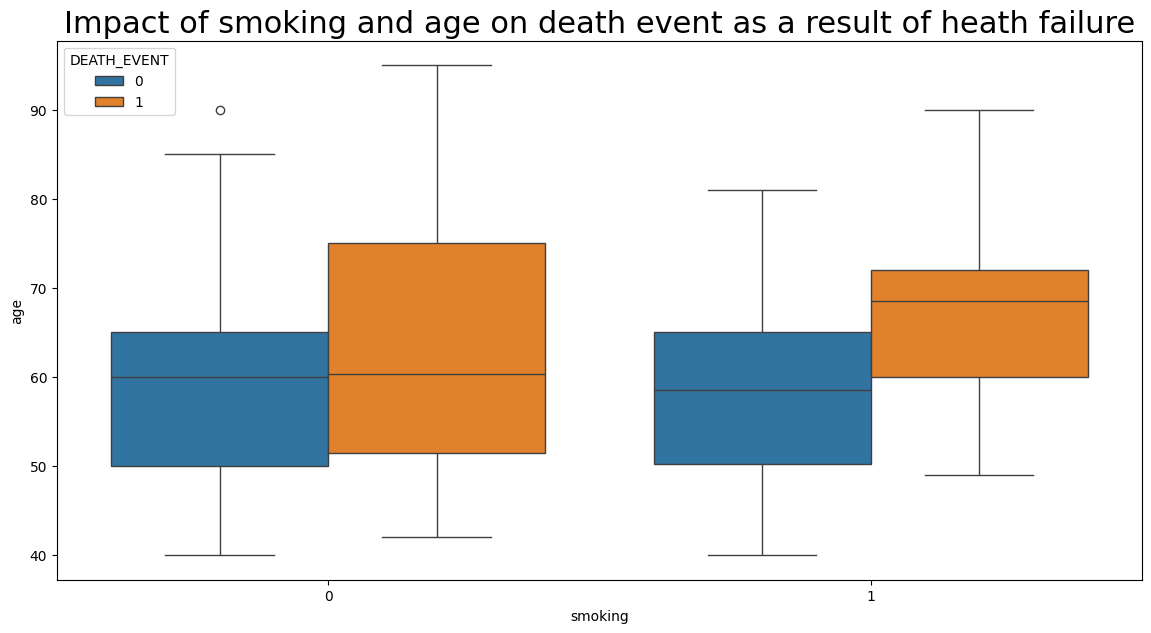

In [20]:
plt.figure(figsize=(14,7))
sns.boxplot(data=data, x="smoking", y="age", hue="DEATH_EVENT")
plt.title("Impact of smoking and age on death event as a result of heath failure",fontsize=22)
plt.show()

**INSIGHT:** The boxlot illustrate the impact of smoking and age on death event as a result of heart failure.

**Smokers**
The boxplot shows an mean age of close to 70 for death event and mean age of 60 for non death event.

**Non-smokers**
The bosplot shows the same mean age of 60 for both death event and non death event.

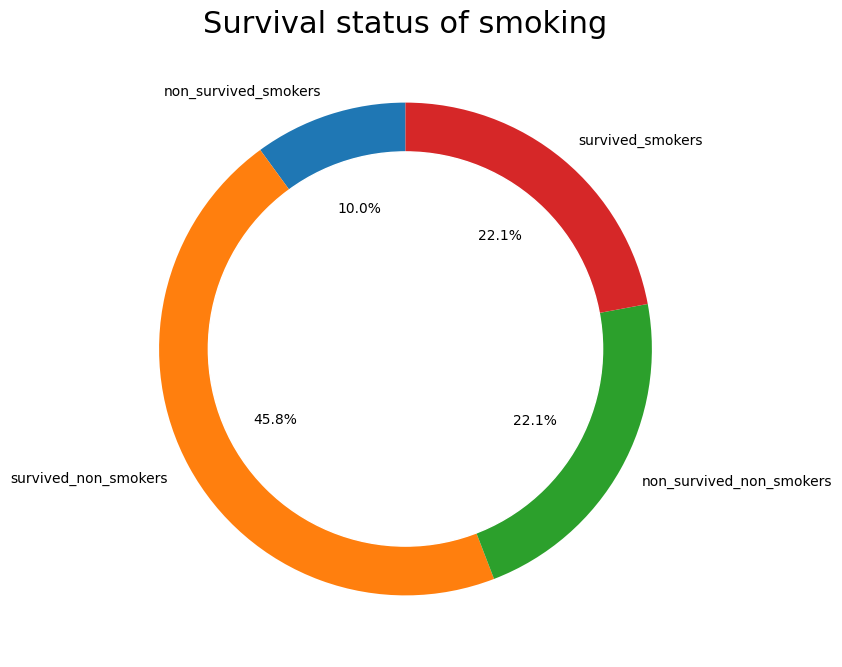

In [21]:
#Analysing the survival status of smoking

smokers= data[data["smoking"]==1]
non_smokers= data[data["smoking"]==0]

non_survived_smokers = smokers[smokers["DEATH_EVENT"]==1]
survived_smokers = smokers[smokers["DEATH_EVENT"]==0]
non_survived_non_smokers = non_smokers[non_smokers["DEATH_EVENT"]==1]
survived_non_smokers = non_smokers[non_smokers["DEATH_EVENT"]==0]

smoking_data= [len(non_survived_smokers), len(survived_non_smokers), len(non_survived_non_smokers), len(survived_smokers)]
smoking_labels= ["non_survived_smokers","survived_non_smokers", "non_survived_non_smokers","survived_smokers"]

plt.figure(figsize=(8,8))
plt.pie(smoking_data, labels= smoking_labels, autopct= '%.1f%%', startangle= 90)
circle= plt.Circle((0,0), 0.8, color= "white")
p= plt.gcf()
p.gca().add_artist(circle)
plt.title("Survival status of smoking", fontsize=22)
plt.show()


**INSIGHT:** The doughut chart shows the ratio of non_survived_non_smoker and survived_non_smokers are almost the same with the ratio of non_survived_smokers and survived_smokers

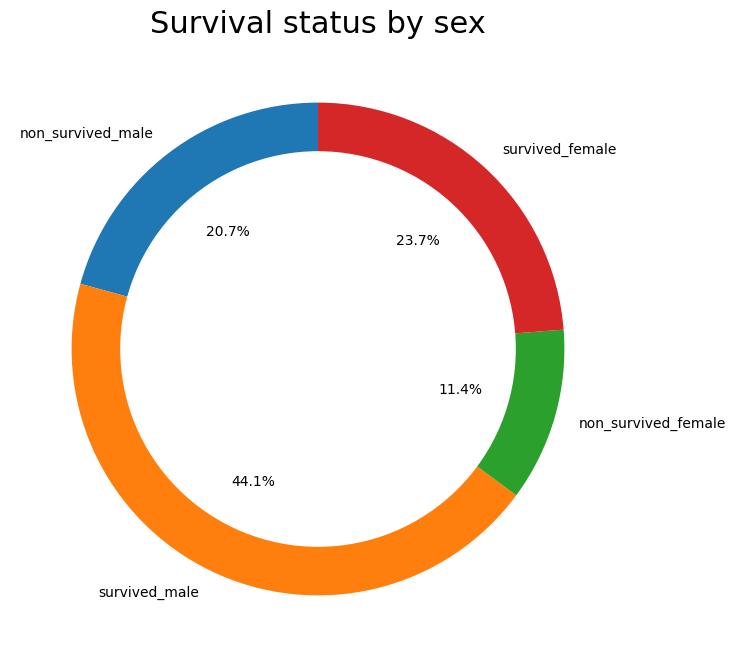

In [22]:
#Analysing the survival status by sex

male= data[data["sex"]==1]
female= data[data["sex"]==0]

non_survived_male = male[male["DEATH_EVENT"]==1]
survived_male = male[male["DEATH_EVENT"]==0]
non_survived_female = female[female["DEATH_EVENT"]==1]
survived_female = female[female["DEATH_EVENT"]==0]

sex_data= [len(non_survived_male), len(survived_male), len(non_survived_female), len(survived_female)]
sex_labels= ["non_survived_male","survived_male", "non_survived_female","survived_female"]

plt.figure(figsize=(8,8))
plt.pie(sex_data, labels= sex_labels, autopct= '%.1f%%', startangle= 90)
circle= plt.Circle((0,0), 0.8, color= "white")
p= plt.gcf()
p.gca().add_artist(circle)
plt.title("Survival status by sex", fontsize=22)
plt.show()

**INSIGHT:** The doughut chart shows the ratio of non_survived_male and survived_male are almost the same with the ratio of non_survived_female and survived_female

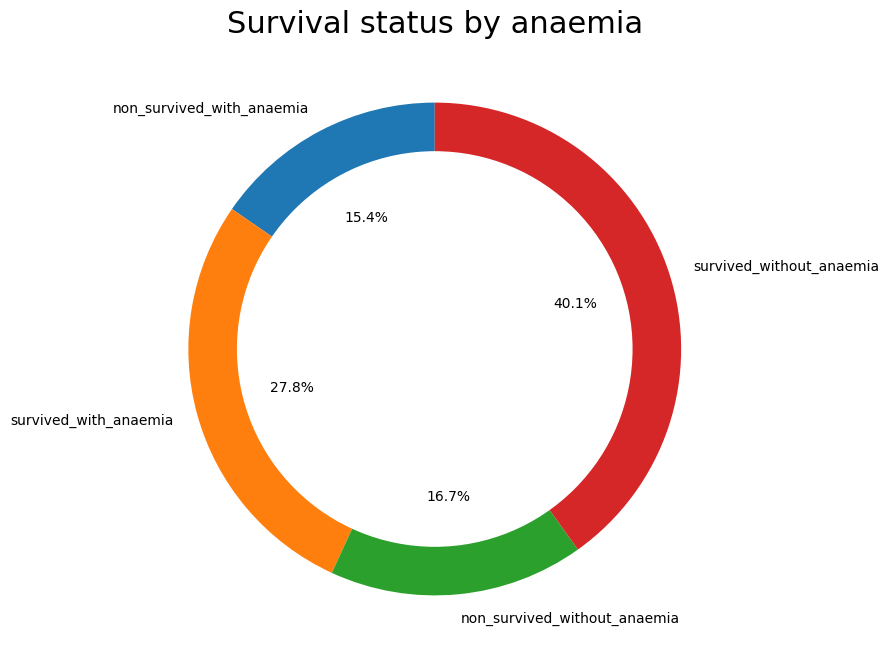

In [23]:
#Analysing the survival status by anaemia

with_anaemia= data[data["anaemia"]==1]
without_anaemia= data[data["anaemia"]==0]

non_survived_with_anaemia = with_anaemia[with_anaemia["DEATH_EVENT"]==1]
survived_with_anaemia = with_anaemia[with_anaemia["DEATH_EVENT"]==0]
non_survived_without_anaemia = without_anaemia[without_anaemia["DEATH_EVENT"]==1]
survived_without_anaemia = without_anaemia[without_anaemia["DEATH_EVENT"]==0]

anaemia_data= [len(non_survived_with_anaemia), len(survived_with_anaemia), len(non_survived_without_anaemia), len(survived_without_anaemia)]
anaemia_labels= ["non_survived_with_anaemia","survived_with_anaemia", "non_survived_without_anaemia","survived_without_anaemia"]

plt.figure(figsize=(8,8))
plt.pie(anaemia_data, labels= anaemia_labels, autopct= '%.1f%%', startangle= 90)
circle= plt.Circle((0,0), 0.8, color= "white")
p= plt.gcf()
p.gca().add_artist(circle)
plt.title("Survival status by anaemia", fontsize=22)
plt.show()

**INSIGHT:** The ratio of non_survived with_anaemia and survived with_anaemia is greater than survived without_anaemia and non_survived without_anaemia.

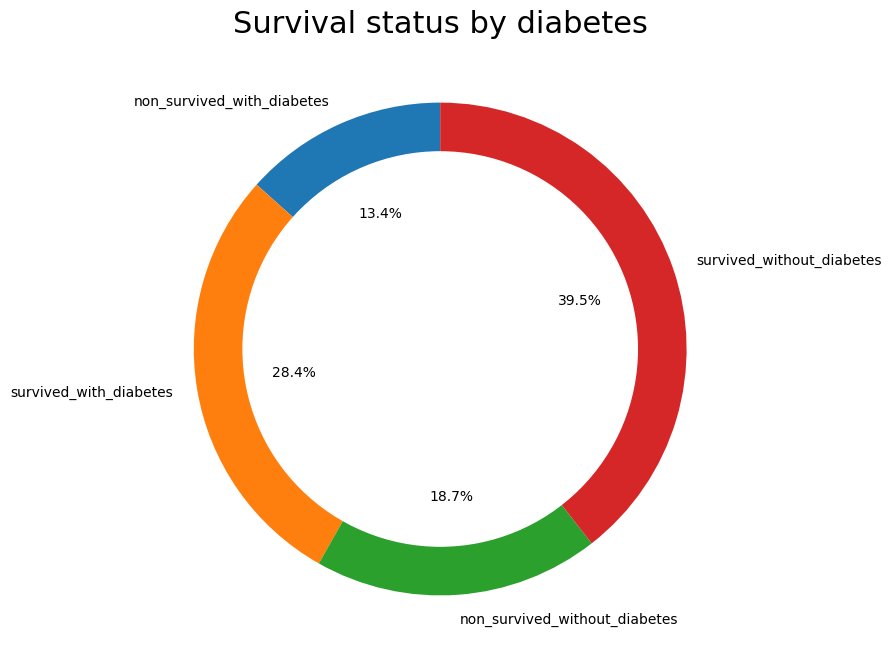

In [24]:
#Analysing the survival status by diabetes

with_diabetes= data[data["diabetes"]==1]
without_diabetes= data[data["diabetes"]==0]

non_survived_with_diabetes = with_diabetes[with_diabetes["DEATH_EVENT"]==1]
survived_with_diabetes = with_diabetes[with_diabetes["DEATH_EVENT"]==0]
non_survived_without_diabetes = without_diabetes[without_diabetes["DEATH_EVENT"]==1]
survived_without_diabetes = without_diabetes[without_diabetes["DEATH_EVENT"]==0]

diabetes_data= [len(non_survived_with_diabetes), len(survived_with_diabetes), len(non_survived_without_diabetes), len(survived_without_diabetes)]
diabetes_labels= ["non_survived_with_diabetes","survived_with_diabetes", "non_survived_without_diabetes","survived_without_diabetes"]

plt.figure(figsize=(8,8))
plt.pie(diabetes_data, labels= diabetes_labels, autopct= '%.1f%%', startangle= 90)
circle= plt.Circle((0,0), 0.8, color= "white")
p= plt.gcf()
p.gca().add_artist(circle)
plt.title("Survival status by diabetes", fontsize=22)
plt.show()

**INSIGHT:** The doughut chart shows the ratio of non_survived_with_diabetes and survived_with_diabetes are almost the same with the ratio of non_survived_without_diabetes and survived_without_diabetes

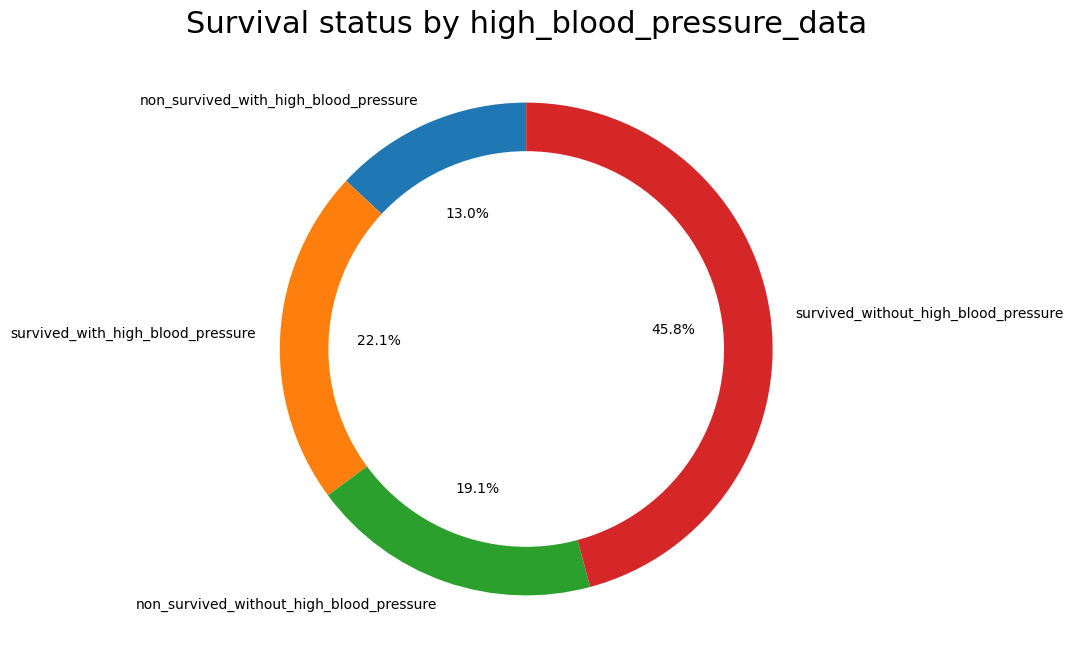

In [25]:
#Analysing the survival status by high blood pressure

with_high_blood_pressure= data[data["high_blood_pressure"]==1]
without_high_blood_pressure= data[data["high_blood_pressure"]==0]

non_survived_with_high_blood_pressure = with_high_blood_pressure[with_high_blood_pressure["DEATH_EVENT"]==1]
survived_with_high_blood_pressure = with_high_blood_pressure[with_high_blood_pressure["DEATH_EVENT"]==0]
non_survived_without_high_blood_pressure = without_high_blood_pressure[without_high_blood_pressure["DEATH_EVENT"]==1]
survived_without_high_blood_pressure = without_high_blood_pressure[without_high_blood_pressure["DEATH_EVENT"]==0]

high_blood_pressure_data= [len(non_survived_with_high_blood_pressure), len(survived_with_high_blood_pressure), len(non_survived_without_high_blood_pressure), len(survived_without_high_blood_pressure)]
high_blood_pressure_labels= ["non_survived_with_high_blood_pressure","survived_with_high_blood_pressure", "non_survived_without_high_blood_pressure","survived_without_high_blood_pressure"]

plt.figure(figsize=(8,8))
plt.pie(high_blood_pressure_data, labels= high_blood_pressure_labels, autopct= '%.1f%%', startangle= 90)
circle= plt.Circle((0,0), 0.8, color= "white")
p= plt.gcf()
p.gca().add_artist(circle)
plt.title("Survival status by high_blood_pressure_data", fontsize=22)
plt.show()

**INSIGHT:** The ratio of non_survived with_high_blood_pressure_data and survived with_high_blood_pressure_data is greater than survived without_high_blood_pressure_data and non_survived without_high_blood_pressure_data.

##**STEP THREE:** Data modelling and prediction with continous data

In [26]:
x= data[["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium","time"]]
y= data["DEATH_EVENT"]

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=2)

In [28]:
#data scaling
scaler = StandardScaler()
x_train_scaled= scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [29]:
accuracy_list =[] #This is a list to save all the values from different models accuracy for comparison using a bar chart

### **3.1 Logistics Regression**

In [30]:
lr_model = LogisticRegression()
lr_model.fit(x_train_scaled, y_train)
lr_prediction = lr_model.predict(x_test_scaled)
lr_accuracy =(round(accuracy_score(lr_prediction, y_test), 4) *100) #percentage
accuracy_list.append(lr_accuracy)

### **3.2 Support Vector Machine**

In [31]:
svc_model = SVC()
svc_model.fit(x_train_scaled, y_train)
svc_prediction = svc_model.predict(x_test_scaled)
svc_accuracy= (round(accuracy_score(svc_prediction, y_test), 4) *100) #percentage
accuracy_list.append(svc_accuracy)

### **3.3 KNearestNeighbor**

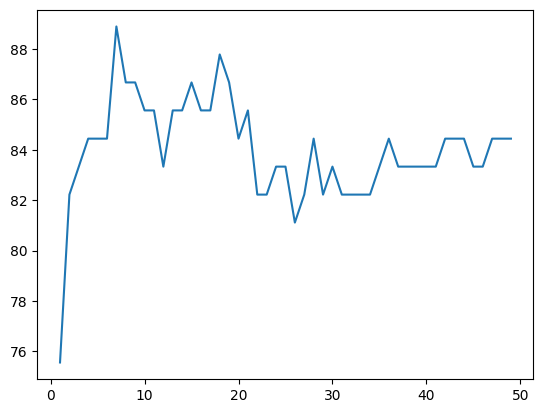

In [32]:
#This code is use to find the optimal value of k
knn_list = []
for k in range(1,50):
  knn_model = KNeighborsClassifier(n_neighbors=k)
  knn_model.fit(x_train_scaled, y_train)
  knn_prediction = knn_model.predict(x_test_scaled)
  knn_accuracy = (round(accuracy_score(knn_prediction, y_test), 4) *100) #percentage
  knn_list.append(knn_accuracy)
k = np.arange(1,50)
plt.plot(k, knn_list)

**INSIGHT:** This illustrations shows that the highest for k is 5

In [33]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train_scaled, y_train)
knn_prediction= knn_model.predict(x_test_scaled)
knn_accuracy= (round(accuracy_score(knn_prediction, y_test), 4) *100) #percentage
accuracy_list.append(knn_accuracy)

### **3.4 Decision Tree Classifier**

In [34]:
dt_model = DecisionTreeClassifier(criterion="entropy", max_depth=2)
dt_model.fit(x_train_scaled, y_train)
dt_prediction= dt_model.predict(x_test_scaled)
dt_accuracy= (round(accuracy_score(dt_prediction, y_test), 4) *100) #percentage
accuracy_list.append(dt_accuracy)

### **3.5 Naive Bayes**

In [35]:
nb_model = GaussianNB()
nb_model.fit(x_train_scaled, y_train)
nb_prediction= nb_model.predict(x_test_scaled)
nb_accuracy= (round(accuracy_score(nb_prediction, y_test), 4) *100) #percentage
accuracy_list.append(nb_accuracy)

### **3.6 Random Forest Classifier**

In [36]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train_scaled, y_train)
rf_prediction= rf_model.predict(x_test_scaled)
rf_accuracy= (round(accuracy_score(rf_prediction, y_test), 4) *100) #percentage
accuracy_list.append(rf_accuracy)

In [37]:
accuracy_list

[87.78, 86.67, 84.44, 88.89, 82.22, 85.56]

In [38]:
models= ["Logistics Regression", "SVC", "KNearestNeighbor", "Decision Tree", "Naive Bayes", "Random Forest"]



<function matplotlib.pyplot.show(close=None, block=None)>

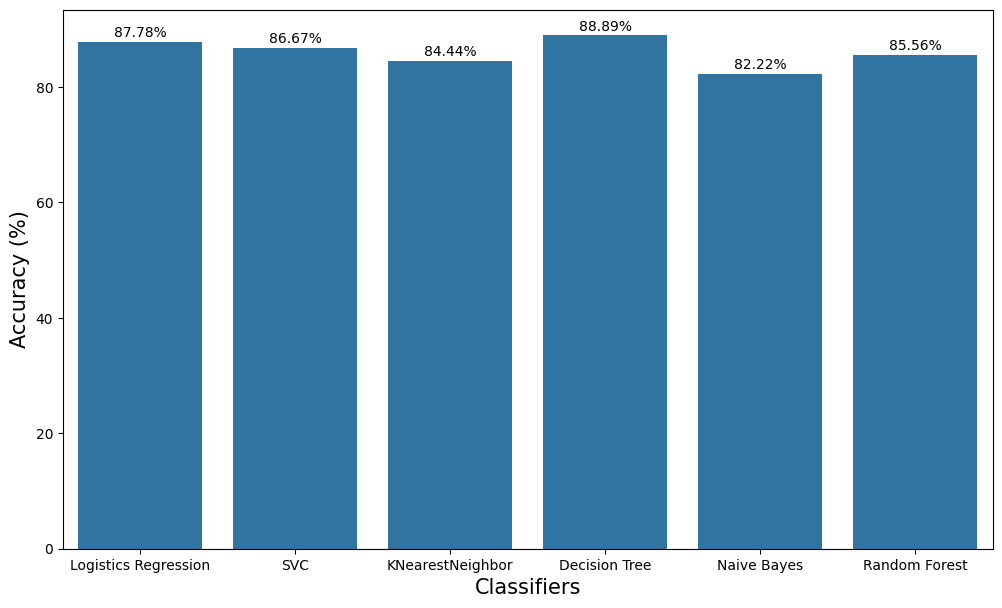

In [40]:
plt.figure(figsize=(12,7))
ax = sns.barplot(x=models, y=accuracy_list)
plt.xlabel("Classifiers", fontsize=15)
plt.ylabel("Accuracy (%)", fontsize=15)
for p in ax.patches:
  width = p.get_width()
  height = p.get_height()
  x=p.get_x()
  y=p.get_y()
  ax.annotate(f"{height}%", (x + width/2, y + height*1.01), ha="center")
plt.show

### **INSIGHT:** The barplot shows that Decision tree as the highest percentage of accuracy